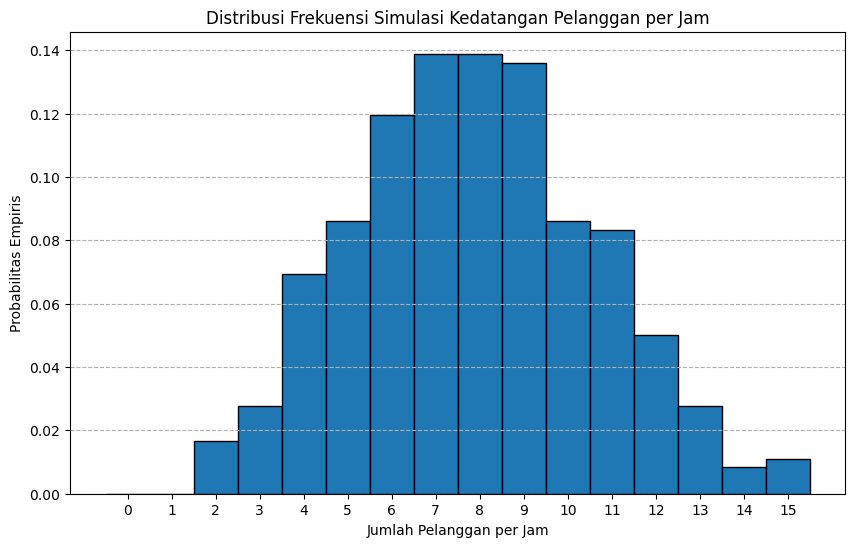


Probabilitas tidak ada pelanggan dalam satu jam (simulasi): 0.0000
Probabilitas lebih dari 10 pelanggan dalam satu jam (simulasi): 0.1806


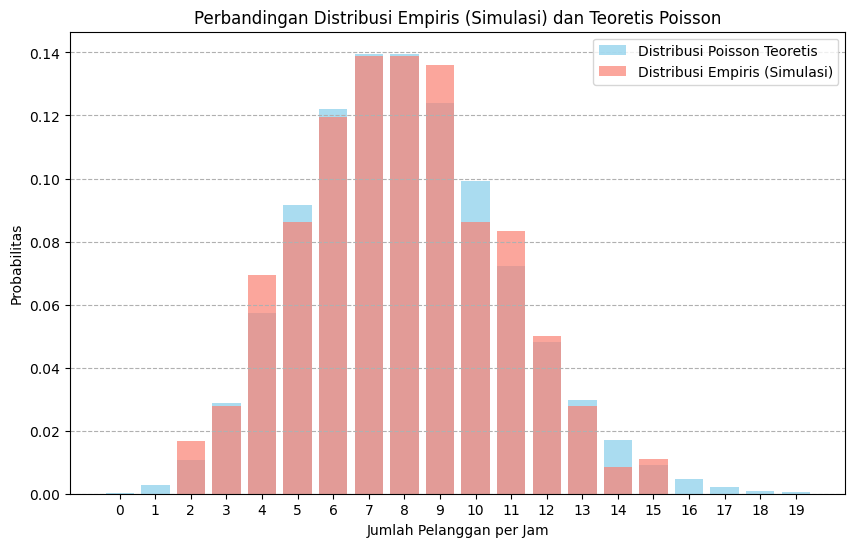


Probabilitas tidak ada pelanggan dalam satu jam (teori): 0.0003
Probabilitas lebih dari 10 pelanggan dalam satu jam (teori): 0.1841

Perbandingan Hasil Simulasi dan Teori:
Probabilitas tidak ada pelanggan:
  - Simulasi: 0.0000
  - Teori:    0.0003
Probabilitas lebih dari 10 pelanggan:
  - Simulasi: 0.1806
  - Teori:    0.1841


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameter
rata_rata_kedatangan = 8  # Rata-rata pelanggan per jam
jam_operasional = 12
jumlah_hari_simulasi = 30

np.random.seed(42)  
simulasi_kedatangan = np.random.poisson(rata_rata_kedatangan, size=(jumlah_hari_simulasi, jam_operasional))

kedatangan_per_jam = simulasi_kedatangan.flatten()

plt.figure(figsize=(10, 6))
plt.hist(kedatangan_per_jam, bins=np.arange(kedatangan_per_jam.max() + 2) - 0.5, edgecolor='black', align='mid', density=True)
plt.title('Distribusi Frekuensi Simulasi Kedatangan Pelanggan per Jam')
plt.xlabel('Jumlah Pelanggan per Jam')
plt.ylabel('Probabilitas Empiris')
plt.xticks(np.arange(kedatangan_per_jam.max() + 1))
plt.grid(axis='y', linestyle='--')
plt.show()

total_jam_simulasi = jumlah_hari_simulasi * jam_operasional

tidak_ada_pelanggan = np.sum(kedatangan_per_jam == 0)
prob_tidak_ada_pelanggan_simulasi = tidak_ada_pelanggan / total_jam_simulasi
print(f"\nProbabilitas tidak ada pelanggan dalam satu jam (simulasi): {prob_tidak_ada_pelanggan_simulasi:.4f}")

lebih_dari_10_pelanggan = np.sum(kedatangan_per_jam > 10)
prob_lebih_dari_10_pelanggan_simulasi = lebih_dari_10_pelanggan / total_jam_simulasi
print(f"Probabilitas lebih dari 10 pelanggan dalam satu jam (simulasi): {prob_lebih_dari_10_pelanggan_simulasi:.4f}")

x = np.arange(0, 20)  
prob_poisson = poisson.pmf(x, rata_rata_kedatangan)

plt.figure(figsize=(10, 6))
plt.bar(x, prob_poisson, color='skyblue', alpha=0.7, label='Distribusi Poisson Teoretis')

unique_kedatangan, counts = np.unique(kedatangan_per_jam, return_counts=True)
prob_empiris = counts / total_jam_simulasi
plt.bar(unique_kedatangan, prob_empiris, color='salmon', alpha=0.7, label='Distribusi Empiris (Simulasi)')

plt.title('Perbandingan Distribusi Empiris (Simulasi) dan Teoretis Poisson')
plt.xlabel('Jumlah Pelanggan per Jam')
plt.ylabel('Probabilitas')
plt.xticks(np.arange(20))
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

prob_tidak_ada_pelanggan_teori = poisson.pmf(0, rata_rata_kedatangan)
print(f"\nProbabilitas tidak ada pelanggan dalam satu jam (teori): {prob_tidak_ada_pelanggan_teori:.4f}")

prob_lebih_dari_10_pelanggan_teori = 1 - poisson.cdf(10, rata_rata_kedatangan)
print(f"Probabilitas lebih dari 10 pelanggan dalam satu jam (teori): {prob_lebih_dari_10_pelanggan_teori:.4f}")

print("\nPerbandingan Hasil Simulasi dan Teori:")
print(f"Probabilitas tidak ada pelanggan:")
print(f"  - Simulasi: {prob_tidak_ada_pelanggan_simulasi:.4f}")
print(f"  - Teori:    {prob_tidak_ada_pelanggan_teori:.4f}")
print(f"Probabilitas lebih dari 10 pelanggan:")
print(f"  - Simulasi: {prob_lebih_dari_10_pelanggan_simulasi:.4f}")
print(f"  - Teori:    {prob_lebih_dari_10_pelanggan_teori:.4f}")